In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.colors as colors
import matplotlib.cm as cm

In [16]:
# Use the following data for this assignment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995]).T

# df = df.groupby(df.index).agg(np.nanmean)
# df.iloc[:,1].agg(Mean = np.nanmean)
df.head()

# Solution 2
df_mean = df.mean(axis=0)
df_mean.iloc[0]


33312.10747554433

In [17]:
# Creating df for means and ci range
data = pd.DataFrame(np.zeros((4,3)), columns = ['Mean', 'Upper', 'Lower'], index = ['92','93','94','95'])

# Find mean and CI range of data, for a given year, Upper and Lower then combined for yerr in pyplot 
for n in range(len(df.columns)):
    col = df.iloc[:,n]
    Mean = col.agg(Mean = np.nanmean)
    Lower, Upper = st.t.interval(alpha=0.95, df=len(df)-1, loc=np.mean(col), scale = st.sem(col)) 
    data['Upper'][n] = Upper - Mean
    data['Lower'][n] = Mean - Lower 
    data['Mean'][n] = Mean

data = data.reset_index()
data.head()

,index,Mean,Upper,Lower
0,92,33312.107476,6510.938018,6510.938018
1,93,41861.859541,3193.254844,3193.254844
2,94,39493.304941,4555.329592,4555.329592
3,95,47743.550969,2264.561291,2264.561291


In [34]:
# onclick set new y value
def onclick(event):
    y = event.ydata
    hline.set_ydata(y)
    
    for i in range(4):
        if y > data.Mean[i]+data.Upper[i]:
            bar[i].set_color(cmap(0.99))
        elif y > data.Mean[i]:
            bar[i].set_color(cmap(0.45))
        elif y > data.Mean[i]-data.Lower[i]:
            bar[i].set_color(cmap(.55))
        else:
            bar[i].set_color(cmap(1))

# Easier Assignment - User Input Function
def user_input(y = 40000):
    hline.set_ydata(y)
    
    for i in range(4):
        if y > data.Mean[i]+data.Upper[i]:
            bar[i].set_color(cmap(0.99))
        elif y > data.Mean[i]:
            bar[i].set_color(cmap(0.45))
        elif y > data.Mean[i]-data.Lower[i]:
            bar[i].set_color(cmap(.55))
        else:
            bar[i].set_color(cmap(1))

<IPython.core.display.Javascript object>


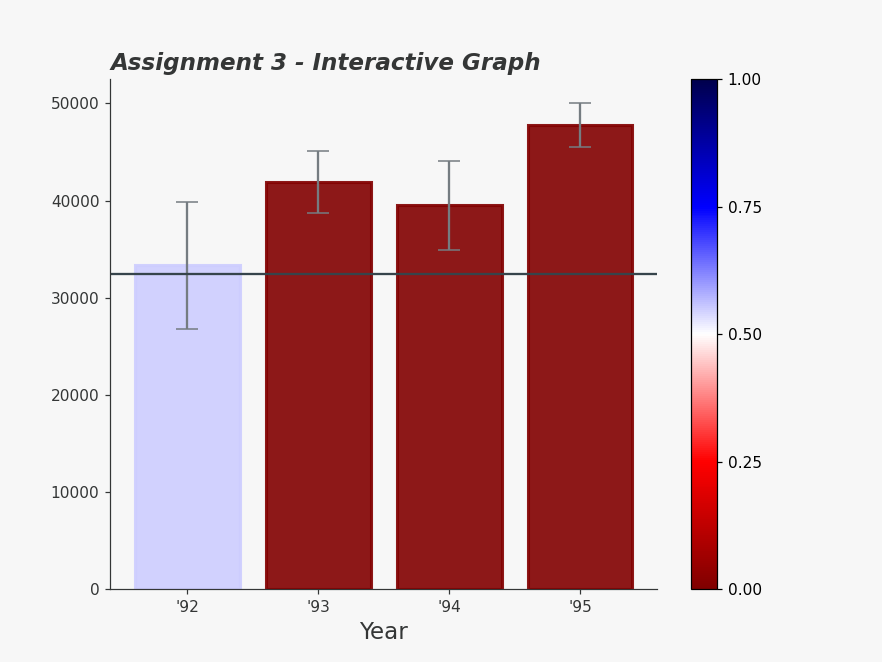

9

In [35]:
# background colour
bgcolour = '#f7f7f7'#3b444b'#'#281c45'
text = '#343636'#e9e8ec'

# default value for hline
y = data.Mean.mean()

# colors for bars
cmap = plt.cm.get_cmap('seismic_r')

fig, ax = plt.subplots(figsize=(8, 6))

bar = plt.bar(data.index, height = data.Mean, 
              yerr = data.Upper, capsize = 7,
              color = cmap(0.99), alpha = 0.9,
              edgecolor = text,
              linewidth = 2,
              ecolor = '#757c81');

hline = plt.axhline(y = y, color = '#36444b')
# tidying up axes
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines[['left', 'bottom']].set_color(text)

# colour bar (Normalise colour map - set to array - apply to colourbar)
norm = cm.colors.Normalize(vmin=0, vmax=1)
colourbar = cm.ScalarMappable(cmap=cmap, norm=norm)
colourbar.set_array([])
plt.colorbar(colourbar, ticks=np.linspace(0, 1, 5));

# plt.gca().spines[['left', 'bottom']]
plt.xticks([0,1,2,3],['\'92','\'93','\'94','\'95'], color = text)
plt.yticks(color = text)
plt.tick_params(color = text)

plt.gca().set_xlabel('Year', color = text, size = 15,
                    font = 'oswald')
plt.gca().set_title('Assignment 3 - Interactive Graph', 
                    loc = 'left', color = text, size = 15,
                    fontweight = 'bold', font = 'oswald',
                    fontstyle = 'oblique')


# background colours
plt.gca().set_facecolor(bgcolour)
fig.patch.set_facecolor(bgcolour)

    
# Input Number here (dafault is 40,000)
# user_input(41000)    

# plt.show()

# Not working - returning an integer instead??!!
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
# plt.savefig('/assignment3graph.png')